In [1]:
%matplotlib inline
import numpy as np
import torch
from torch.utils.serialization import load_lua
import os
import scipy.io as sio
import cv2
import math
from matplotlib import pyplot as plt
import imp

import h5py

utils = imp.load_source('utils', '../code/utils.py')

In [2]:
DATA_DIR = '/Data/nruiz9/data/facial_landmarks/AFW/testimages/'

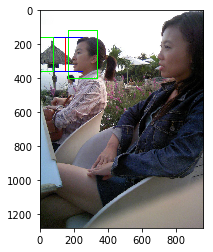

yaw, pitch, roll:  60.0 0.0 -0.0


In [12]:
idx = 7

mat_path = '/Data/nruiz9/data/facial_landmarks/AFW/testimages/anno_compat.mat'
mat = sio.loadmat(mat_path)
mat = mat['S'][0][0][0]

stats = mat[idx,:]
img_name = stats[0][0]

img_path = os.path.join(DATA_DIR, img_name)
                   
img = cv2.imread(img_path)

bbox = stats[1][0][0]
x1, y1 = bbox[0]
x2, y2 = bbox[1]

k = 0.25
x1 -= 0.6 * k * abs(x2 - x1)
y1 -= 3 * k * abs(y2 - y1)
x2 += 0.6 * k * abs(x2 - x1)
y2 += 0.6 * k * abs(y2 - y1)

yaw, pitch, roll = stats[2][0][0][0]

yaw = float(yaw)
pitch = float(pitch)
roll = float(roll)

yaw = -yaw
roll = -roll
# roll = .0
# pitch = .0

img = cv2.rectangle(img, (int(x1),int(y1)), (int(x2),int(y2)), (0,255,0), 3)
utils.plot_pose_cube(img, yaw, pitch, roll, (x2+x1) / 2, (y2+y1) / 2, size=200)

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)
plt.show()
print 'yaw, pitch, roll: ', yaw, pitch, roll

In [27]:

for idx in xrange(mat.shape[0]):
    mat_path = '/Data/nruiz9/data/facial_landmarks/AFW/testimages/anno_compat.mat'
    mat = sio.loadmat(mat_path)
    mat = mat['S'][0][0][0]

    stats = mat[idx,:]
    img_name = stats[0][0]

    img_path = os.path.join(DATA_DIR, img_name)

    img = cv2.imread(img_path)
    
    bboxes = stats[1][0][:]
    for idy, bbox in enumerate(bboxes):
        txt_path = img_path.split('.')[0] + '_' + str(idy) + '.txt'
        out = open(txt_path, 'wb')
        x1, y1 = bbox[0]
        x2, y2 = bbox[1]

        yaw, pitch, roll = stats[2][0][idy][0]

        yaw = float(yaw)
        pitch = float(pitch)
        roll = float(roll)

        yaw = -yaw
        roll = -roll

        out.write(img_path + ' ' + str(yaw) + ' ' + str(pitch) + ' ' + str(roll) + ' ' + str(x1) + ' ' + str(y1) + ' ' + str(x2) + ' ' + str(y2) + '\n')
        out.close()